# Exercise 1 

In [2]:
import numpy as np
import scipy.sparse as sp
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import time
np.set_printoptions(precision=3)


In [3]:
from qutip import Qobj

In [4]:
# Parameters

weg=1 #\omega_eg 
Omega=0.2  # Rabi frequency
wL=0.9  # resonant driving
#Hamilton operator (2x2 matrix)

H0=np.array([[0,0],[0,weg]])
Hdrive=Omega*np.array([[0,1],[1,0]])

#initial state 
d=2 #Hilbertspace dimension
psi0=np.zeros(d,dtype=np.complex64)  # define as complex  
psi0[0]=1  # ground state

Qobj(H0)
Qobj(Hdrive)
#Qobj(psi0)


Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=Dense, isherm=True
Qobj data =
[[0.  0.2]
 [0.2 0. ]]

In [5]:
def psidot(t, psi, H0, Hdrive, wL):
    H_ges = H0+Hdrive*np.cos(wL*t)
    return -1j*H_ges.dot(psi)

We have now defined the initial states, the Hamiltonian and the Schrödinger equation (while ignoring hbar)

In [6]:
tsteps= 301
t_span = np.linspace(0,20*np.pi,tsteps)  
sol=solve_ivp(psidot,(t_span[0],t_span[-1]),psi0,t_eval=t_span,args=[H0,Hdrive,wL]) 
psi_t=sol.y

Text(0.5, 1.0, 'Time evolution of the population for the full Hamiltonian')

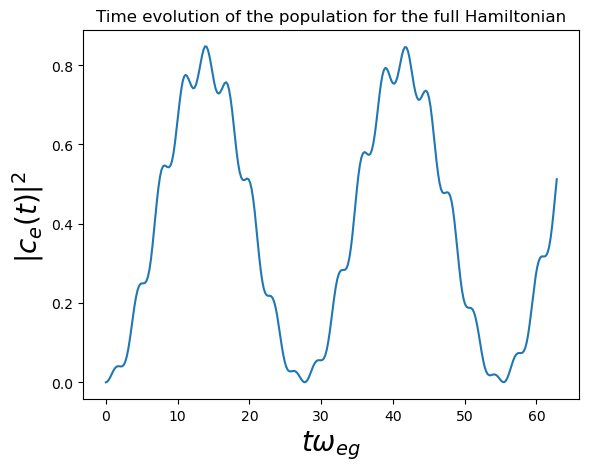

In [7]:
c_e=np.abs(psi_t.T)**2
#Plot results:
plt.figure(dpi = 100)
ce = psi_t[1]
plt.plot(t_span,np.abs(ce)**2)
plt.xlabel(r'$t\omega_{eg}$ ', fontsize = 20)
plt.ylabel(r'$|c_e(t)|^2$ ', fontsize =20)
plt.title(r'Time evolution of the population for the full Hamiltonian')

The time evolution of the ground state can be retained from this plot by considering that the probabilities have to add up to one. I have here simulated the time evolution with a nonzero detuning.

Now I'll do the same for the Hamiltonian under the Rotating Wave Approximation

In [8]:
delta = wL-weg
HRWA0=-delta*np.array([[0,0],[0,weg]])
HRWAdrive= Omega/2*np.array([[0,1],[1,0]])
psiRWA0=psi0
def psiRWAdot(t,psiRWA, HRWA0, HRWAdrive, delta):
    HRWA = HRWA0 + HRWAdrive
    return -1j*HRWA.dot(psiRWA)

In [9]:
solRWA=solve_ivp(psiRWAdot,(t_span[0],t_span[-1]),psiRWA0,t_eval=t_span,args=[HRWA0,HRWAdrive,delta])
psiRWA_t=solRWA.y

Text(0.5, 1.0, 'Time evolution of the population')

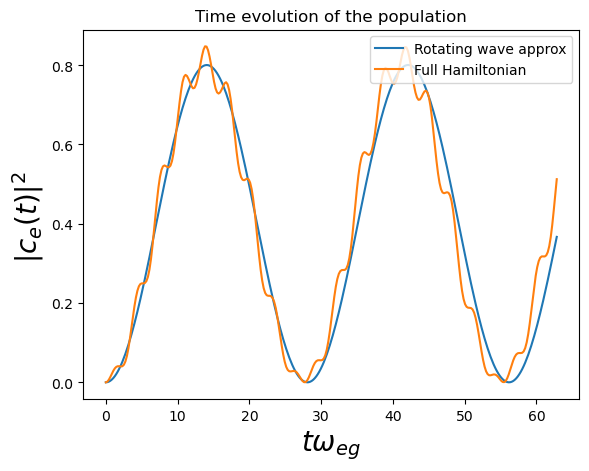

In [10]:
ceRWA = psiRWA_t[1]
plt.plot(t_span,np.abs(ceRWA)**2, label=[r'Rotating wave approx'])
plt.plot(t_span,np.abs(ce)**2, label = [r'Full Hamiltonian'])
plt.xlabel(r'$t\omega_{eg}$ ', fontsize = 20)
plt.ylabel(r'$|c_e(t)|^2$ ', fontsize =20)
plt.legend(loc='upper right')
plt.title(r'Time evolution of the population')

With this plot, we can compare the RWA with the non-approximated case. We can see that overall, the obtained dynamics are the same. However, with the RWA, the small oscilations that can be seen in the orange plot, dissappear for the RWA. 

# Exercise 2

## (a)

In [11]:
U = 0.1
w1 = 1
w2 = 2*w1+U
wd = 1


H0 = np.array([[0,0,0],[0,w1,0], [0,0,w2]])
Hdrive = Omega*np.array([[0,1,0],[1,0,1],[0,1,0]])

Qobj(Hdrive)

Quantum object: dims=[[3], [3]], shape=(3, 3), type='oper', dtype=Dense, isherm=True
Qobj data =
[[0.  0.2 0. ]
 [0.2 0.  0.2]
 [0.  0.2 0. ]]

In [12]:
d = 3
psi0 = np.zeros(d, dtype = np.complex64)
psi0[0] = 1

In [13]:
def psidot(t, psi, H0, Hdrive, wd):
    H = H0 + Hdrive*np.cos(wd*t)
    return -1j*H.dot(psi)

In [14]:
tsteps= 301
t_span = np.linspace(0,20*np.pi,tsteps)    #time grid for the solution    

sol=solve_ivp(psidot,(t_span[0],t_span[-1]),psi0,t_eval=t_span,args=[H0,Hdrive,wd]) 
psi_t=sol.y

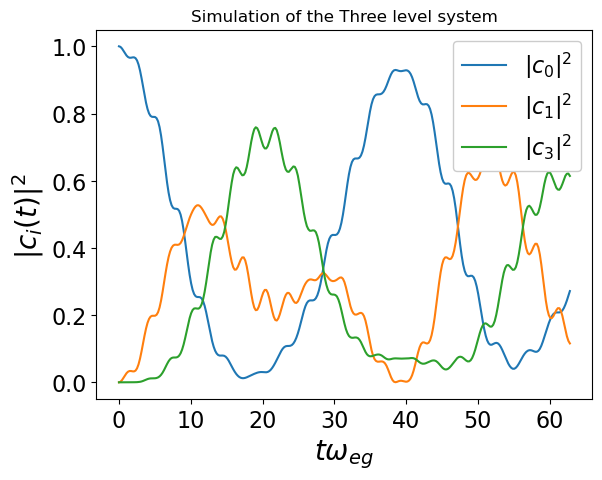

In [15]:
plt.figure(dpi = 100)
plt.plot(t_span,np.abs(psi_t.T)**2,label=[r'$|c_0|^2$',r'$|c_1|^2$', r'$|c_3|^2$'])
plt.xlabel(r'$t\omega_{eg}$ ', fontsize = 20)
plt.ylabel(r'$|c_i(t)|^2$ ', fontsize =20)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.title('Simulation of the Three level system')
plt.legend(loc='upper right', fontsize=16,facecolor='white',framealpha=1)
plt.show()

## (b)

In [16]:
U1 = 0.01 
U2= 0.1
U3 = 0.5
U4 = 1
U5 = 5
U6 = 10
w1 = 1
w2_1 = 2*w1+U1
w2_2 = 2*w1+U2
w2_3 = 2*w1+U3
w2_4= 2*w1+U4
w2_5 = 2*w1+U5
w2_6 = 2*w1+U6
wd = 1
Omega = 0.2

In [17]:
H01 = np.array([[0,0,0],[0,w1,0], [0,0,w2_1]])
H02 = np.array([[0,0,0],[0,w1,0], [0,0,w2_2]])
H03 = np.array([[0,0,0],[0,w1,0], [0,0,w2_3]])
H04 = np.array([[0,0,0],[0,w1,0], [0,0,w2_4]])
H05 = np.array([[0,0,0],[0,w1,0], [0,0,w2_5]])
H06 = np.array([[0,0,0],[0,w1,0], [0,0,w2_6]])
Hdrive = Omega*np.array([[0,1,0],[1,0,1],[0,1,0]])

Qobj(H01)

Quantum object: dims=[[3], [3]], shape=(3, 3), type='oper', dtype=Dense, isherm=True
Qobj data =
[[0.   0.   0.  ]
 [0.   1.   0.  ]
 [0.   0.   2.01]]

In [18]:
def psidot1(t, psi, H01, Hdrive, wd):
    H = H01 + Hdrive*np.cos(wd*t)
    return -1j*H.dot(psi)

def psidot2(t, psi, H02, Hdrive, wd):
    H = H02 + Hdrive*np.cos(wd*t)
    return -1j*H.dot(psi)

def psidot3(t, psi, H03, Hdrive, wd):
    H = H03 + Hdrive*np.cos(wd*t)
    return -1j*H.dot(psi)

def psidot4(t, psi, H04, Hdrive, wd):
    H = H04 + Hdrive*np.cos(wd*t)
    return -1j*H.dot(psi)

def psidot5(t, psi, H05, Hdrive, wd):
    H = H05 + Hdrive*np.cos(wd*t)
    return -1j*H.dot(psi)

def psidot6(t, psi, H06, Hdrive, wd):
    H = H06 + Hdrive*np.cos(wd*t)
    return -1j*H.dot(psi)



In [19]:
sol1=solve_ivp(psidot1,(t_span[0],t_span[-1]),psi0,t_eval=t_span,args=[H01,Hdrive,wd]) 
psi1_t=sol1.y
sol2=solve_ivp(psidot2,(t_span[0],t_span[-1]),psi0,t_eval=t_span,args=[H02,Hdrive,wd]) 
psi2_t=sol2.y
sol3=solve_ivp(psidot3,(t_span[0],t_span[-1]),psi0,t_eval=t_span,args=[H03,Hdrive,wd]) 
psi3_t=sol3.y
sol4=solve_ivp(psidot4,(t_span[0],t_span[-1]),psi0,t_eval=t_span,args=[H04,Hdrive,wd]) 
psi4_t=sol4.y
sol5=solve_ivp(psidot5,(t_span[0],t_span[-1]),psi0,t_eval=t_span,args=[H05,Hdrive,wd]) 
psi5_t=sol5.y
sol6=solve_ivp(psidot6,(t_span[0],t_span[-1]),psi0,t_eval=t_span,args=[H06,Hdrive,wd]) 
psi6_t=sol6.y

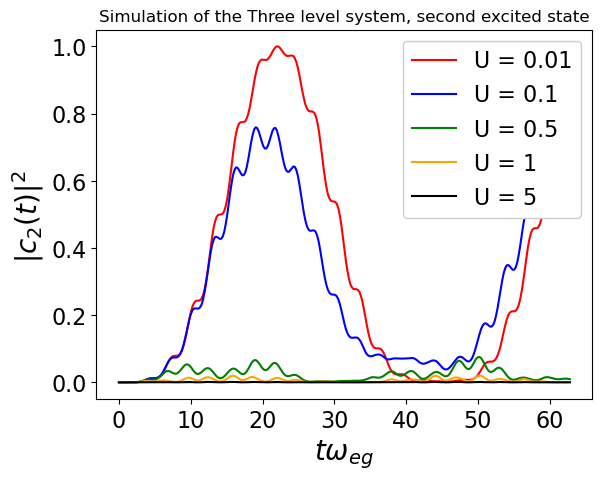

In [20]:
c1 = psi1_t[2]
c2 = psi2_t[2]
c3 = psi3_t[2]
c4 = psi4_t[2]
c5 = psi5_t[2]
c6 = psi6_t[2]

plt.plot(t_span,np.abs(c1.T)**2,label=[r'U = 0.01'], color='red', )
plt.plot(t_span,np.abs(c2.T)**2,label=[r'U = 0.1'], color='blue')
plt.plot(t_span,np.abs(c3.T)**2,label=[r'U = 0.5'], color='green')
plt.plot(t_span,np.abs(c4.T)**2,label=[r'U = 1'], color='orange')
plt.plot(t_span,np.abs(c5.T)**2,label=[r'U = 5'], color='black')
#plt.plot(t_span,np.abs(c6.T)**2,label=[r'U = 10'], color='yellow')
plt.xlabel(r'$t\omega_{eg}$ ', fontsize = 20)
plt.ylabel(r'$|c_2(t)|^2$ ', fontsize =20)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.title('Simulation of the Three level system, second excited state')
plt.legend(loc='upper right', fontsize=16,facecolor='white',framealpha=1)
plt.show()

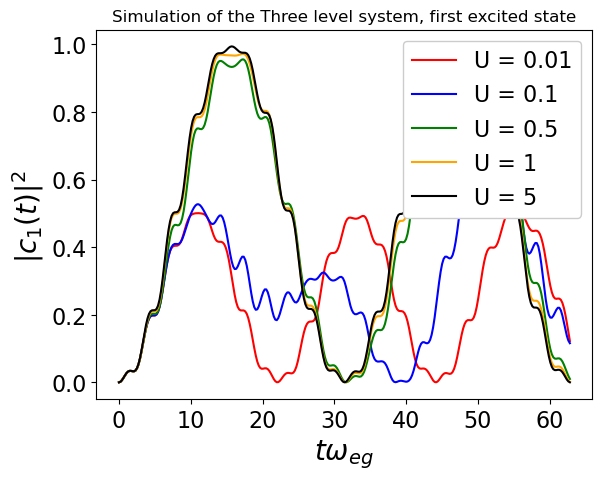

In [21]:
c1 = psi1_t[1]
c2 = psi2_t[1]
c3 = psi3_t[1]
c4 = psi4_t[1]
c5 = psi5_t[1]
c6 = psi6_t[1]

plt.plot(t_span,np.abs(c1.T)**2,label=[r'U = 0.01'], color='red', )
plt.plot(t_span,np.abs(c2.T)**2,label=[r'U = 0.1'], color='blue')
plt.plot(t_span,np.abs(c3.T)**2,label=[r'U = 0.5'], color='green')
plt.plot(t_span,np.abs(c4.T)**2,label=[r'U = 1'], color='orange')
plt.plot(t_span,np.abs(c5.T)**2,label=[r'U = 5'], color='black')
#plt.plot(t_span,np.abs(c6.T)**2,label=[r'U = 10'], color='yellow')
plt.xlabel(r'$t\omega_{eg}$ ', fontsize = 20)
plt.ylabel(r'$|c_1(t)|^2$ ', fontsize =20)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.title('Simulation of the Three level system, first excited state')
plt.legend(loc='upper right', fontsize=16,facecolor='white',framealpha=1)
plt.show()

We can see from these plots, that with growing U, the second excited state becomes less and less populated and thus less relevant. Consequently, the population of the first excited state behaves more and more like in the two level system for growing U.

# (c)

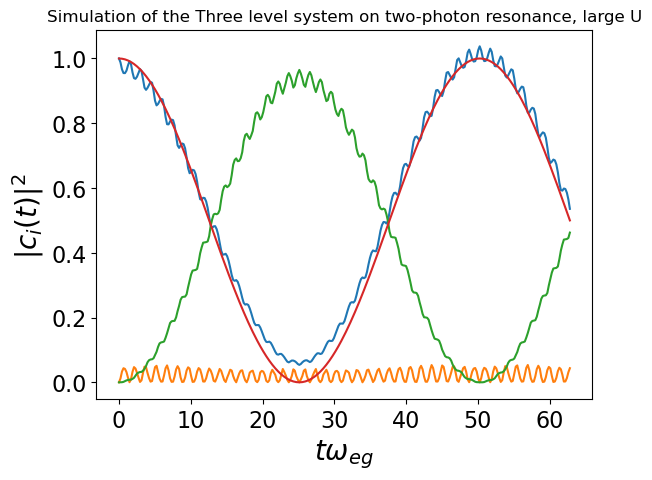

In [24]:
Omega = 1
w1 = 15
U = 8
w2 = 2*w1+U
wd = w2/2

H0 = np.array([[0,0,0],[0,w1,0], [0,0,w2]])
Hdrive = Omega*np.array([[0,1,0],[1,0,1],[0,1,0]])
d = 3
psi0 = np.zeros(d, dtype = np.complex64)
psi0[0] = 1
def psidot(t, psi, H0, Hdrive, wd):
    H = H0 + Hdrive*np.cos(wd*t)
    return -1j*H.dot(psi)
tsteps= 301
t_span = np.linspace(0,20*np.pi,tsteps)    #time grid for the solution    

sol=solve_ivp(psidot,(t_span[0],t_span[-1]),psi0,t_eval=t_span,args=[H0,Hdrive,wd]) 
psi_t=sol.y
plt.figure(dpi = 100)
plt.plot(t_span,np.abs(psi_t.T)**2,label=[r'$|c_0|^2$',r'$|c_1|^2$', r'$|c_2|^2$'])
plt.plot(t_span,np.cos(Omega**2/U*t_span/2)**2, label = [r'$cos^2(\Omega_{eff}t)$'])
plt.xlabel(r'$t\omega_{eg}$ ', fontsize = 20)
plt.ylabel(r'$|c_i(t)|^2$ ', fontsize =20)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.title('Simulation of the Three level system on two-photon resonance, large U')
#plt.legend(loc='upper right', fontsize=16,facecolor='white',framealpha=1)
plt.show()

It can be seen here, that the result is similar to what we would get for Rabi Oscillations as described in the exercise (red line).